In [33]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Open the input and output files
with open('HSBC_Examples/TstUoB_2024-01-02LOBs.txt', 'r') as infile, open('2024-01-02LOBs.csv', 'w', newline='') as outfile:
    # Create a CSV writer object
    writer = csv.writer(outfile)

    # Write the header row
    writer.writerow(['time', 'bid', 'ask'])

    # Loop over each line in the input file
    for line in infile:
        # Split the line into its components
        components = eval(line)

        # Extract the required data
        if len(components[2][1]) < 5 or len(components[3][1]) < 5:
            continue
        else:
            time = components[1]      
            bid = round(np.average([item[0] for item in components[2][1]]),2)
            ask = round(np.average([item[0] for item in components[3][1]]),2)

        # Write the data to the output file
        writer.writerow([time, bid, ask])

In [35]:
df = pd.read_csv('2024-01-02LOBs.csv')

## Check the dimensions and basic information of the Data

In [36]:
df.head(10)

,time,bid,ask
0,13.237,219.0,358.71
1,13.268,219.0,358.71
2,13.299,219.0,358.71
3,13.330,219.0,358.71
4,13.361,219.0,358.71
5,13.392,219.0,358.71
6,13.423,219.0,358.71
7,13.454,219.0,358.71
8,13.485,219.0,349.62
9,13.516,219.0,349.62


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631676 entries, 0 to 631675
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    631676 non-null  float64
 1   bid     631676 non-null  float64
 2   ask     631676 non-null  float64
dtypes: float64(3)
memory usage: 14.5 MB


In [38]:
df.describe()

,time,bid,ask
count,631676.000000,631676.000000,631676.000000
mean,14809.561437,209.547160,422.970893
std,9052.847040,29.707367,56.937692
min,13.237000,40.200000,268.170000
25%,6440.335250,191.330000,382.000000
50%,15165.835500,212.000000,417.000000
75%,22669.222750,230.380000,458.000000
max,30599.976000,292.140000,693.600000


## Explore the data distribution

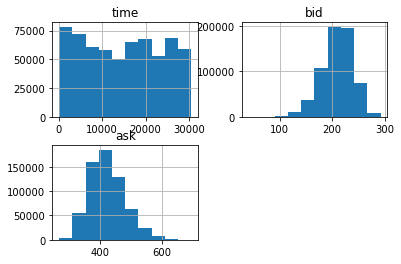

In [39]:
df.hist();

In [40]:
print(df.corr())

          time       bid       ask
time  1.000000 -0.150485 -0.006329
bid  -0.150485  1.000000  0.045046
ask  -0.006329  0.045046  1.000000
